In [16]:
import numpy as np
import pandas as pd
from rake_nltk import Rake
import ast

## Rake-NLTK

In [17]:
r = Rake()

In [3]:
data = pd.read_csv('../data/test_papers_word2vec.csv')
data.sections = data.sections.apply(ast.literal_eval)

In [19]:
data.iloc[0].text

"Through Social media, people are able to write short messages on their walls to express their sentiments using various social media like Twitter and Facebook. Through these messages also called status updates, they share and discuss things like news, jokes, business issues and what they go through on a daily basis. Tweets and other updates have become so important in the world of information and communication because they have a great potential of passing information very fast. They enable interaction among vast groups of people including students, businesses and their clients. These numerous amounts of information can be extracted, processed and properly utilized in areas like marketing and electronic learning. This paper reports on the successful development of a way of searching, filtering, organizing and storing the information from social media so that it can be put to some good use in an electronic learning environment. This helps in solving the problem of losing vital informati

In [22]:
r.extract_keywords_from_text(data.iloc[0].sections['Conclusion'])
r.get_ranked_phrases()[:20]

['challenges including time wastage',
 'enable electronic learning generally',
 'group formation specifically',
 'group formation',
 'therefore come',
 'social media',
 'mostly manual',
 'greater percentage',
 'great potential',
 'efficient way',
 'currently used',
 'learning',
 'used',
 'efficient',
 'underscored',
 'techniques',
 'study',
 'lot',
 'inasmuch',
 'exploited']

In [85]:
data.iloc[1].keywords

"['Smart Cities', 'Traffic Congestion', 'Intelligent Control', 'PIC Microcontroller']"

In [90]:
data.iloc[1].sections.keys()

dict_keys(['Introduction', 'Background', 'Review of Existing Traffic Control System', 'Method', 'System Design Approach', 'Power Supply Unit', 'Components Specification and Calculation', 'Transformer Specification', 'Bridge Rectifier', 'Capacitor', 'Diode', 'Choice of PIC16F876A Microcontroller and Optocoupler', 'Mode of Operation', 'Hard Ware Implementation', 'Software Implementation', 'Results and Discussion', 'Conclusion'])

## NLP

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [4]:
dataset = pd.read_csv('../data/papers_dataset.csv')

dataset.keywords = dataset.keywords.apply(ast.literal_eval)
dataset.sections = dataset.sections.apply(ast.literal_eval)

dataset = dataset[dataset.partition == 'train']

train_df = dataset[['paper_id', 'partition', 'text']]

In [11]:
train_df

,paper_id,partition,text
0,paper_0,train,Heart disease is one of the major causes of li...
4,paper_4,train,The advancement of technology has heralded nov...
5,paper_5,train,The image processing and computer vision syste...
6,paper_6,train,The denoising of the fundus images is an essen...
7,paper_7,train,The goal of this communication is to examine t...
8,paper_8,train,The purpose of the paper is development of a c...
9,paper_9,train,Recent advancements in communication technolog...
10,paper_10,train,"In the last few years, the number of road acci..."
11,paper_11,train,Human role reduction in the firing process in ...
12,paper_12,train,With the deepening of Chinses national strateg...


In [6]:
new_paper = {'paper_id': data.iloc[0].paper_id, 'partition': data.iloc[0].partition, 'text': data.iloc[0].text}
train_df = train_df.append(new_paper, ignore_index=True)

In [31]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df[['text','word_count']].head()

,text,word_count
0,Heart disease is one of the major causes of li...,6699
1,The advancement of technology has heralded nov...,3204
2,The image processing and computer vision syste...,3057
3,The denoising of the fundus images is an essen...,1739
4,The goal of this communication is to examine t...,2521


In [35]:
freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[:20]
freq

the     96386
of      59789
and     43605
to      33215
is      26069
in      25868
a       21989
The     13919
for     13112
that    11550
are     11033
as       9816
be       8914
with     8721
on       8611
by       8201
.        6526
data     6296
can      6292
this     5833
dtype: int64

In [79]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
#new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
#stop_words = stop_words.union(new_words)

In [83]:
corpus = []
for i in range(0, train_df.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', train_df['text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

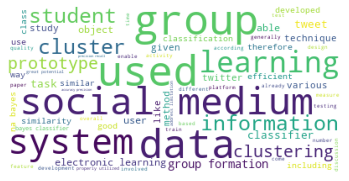

In [47]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus[-1]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(2,5))
X=cv.fit_transform(corpus)

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[-1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [63]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=20):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20)
 
# now print the results
#print("\nAbstract:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Keywords:
social medium 0.527
group formation 0.457
electronic learning 0.306
na bayes classifier 0.196
bayes classifier 0.18
accuracy precision recall 0.153
na bayes 0.149
great potential 0.135
accuracy precision 0.126
precision recall 0.12
prototype developed 0.098
data item 0.092
already known 0.09
given data 0.084
data object 0.084
user group 0.083
collection data 0.083
learning system 0.08
unsupervised learning 0.079
data used 0.077


In [1]:
import pandas as pd
import ast
from keyword_extraction import extract_keywords_section, extract_keywords_paper

dataset = pd.read_csv('../data/papers_dataset.csv')

dataset.keywords = dataset.keywords.apply(ast.literal_eval)
dataset.sections = dataset.sections.apply(ast.literal_eval)

dataset = dataset[dataset.partition == 'train']

train_df = dataset[['paper_id', 'partition', 'text']]

data = pd.read_csv('../data/test_papers_word2vec.csv')
data.sections = data.sections.apply(ast.literal_eval)

ModuleNotFoundError: No module named 'nltk'

In [3]:
extract_keywords_section(data.iloc[0], 'Conclusion', 20)

8


{'group formation': 0.155,
 'social medium': 0.12,
 'way clustering used enable': 0.107,
 'way clustering used': 0.107,
 'way clustering': 0.107,
 'used enable electronic learning': 0.107,
 'used enable electronic': 0.107,
 'enable electronic learning generally': 0.107,
 'enable electronic learning': 0.107,
 'enable electronic': 0.107,
 'electronic learning generally group': 0.107,
 'electronic learning generally': 0.107,
 'efficient way clustering used': 0.107,
 'efficient way clustering': 0.107,
 'clustering used enable electronic': 0.107,
 'clustering used enable': 0.107,
 'clustering used': 0.107,
 'better efficient way clustering': 0.107,
 'wastage social medium better': 0.09,
 'wastage social medium': 0.09}

In [2]:
extract_keywords_paper(text = data.iloc[0].sections['Conclusion'], train_corpus = train_df, num_keywords = 20)

{'social medium': 0.875, 'efficient way': 0.483}

In [7]:
extract_keywords_paper(text = data.iloc[0].text, train_corpus = train_df, num_keywords = 20)

(474, 3)
(475, 4)


{'social medium': 0.527,
 'group formation': 0.457,
 'electronic learning': 0.306,
 'na bayes classifier': 0.196,
 'bayes classifier': 0.179,
 'na bayes': 0.149,
 'great potential': 0.135,
 'accuracy precision': 0.126,
 'precision recall': 0.12,
 'prototype developed': 0.098,
 'data item': 0.092,
 'already known': 0.09,
 'classifier also': 0.088,
 'new user': 0.084,
 'given data': 0.084,
 'data object': 0.084,
 'user group': 0.083,
 'collection data': 0.083,
 'learning system': 0.08,
 'unsupervised learning': 0.079}

In [13]:
data.iloc[0].sections['Conclusion']

'Through the study, it was underscored that inasmuch as the social media has a great potential in education, this has not been exploited to a greater percentage. The techniques that are currently used in group formation and learning are mostly manual and so not efficient. They therefore come with a lot of challenges including time wastage. Through social media a better and more efficient way of clustering can be used to enable electronic learning generally and group formation specifically.'

In [17]:
extract_keywords_section_1(data.iloc[0].sections['Conclusion'], 20)

4


{'way clustering used enable': 0.146,
 'way clustering used': 0.146,
 'way clustering': 0.146,
 'way': 0.146,
 'used enable electronic learning': 0.146,
 'used enable electronic': 0.146,
 'used enable': 0.146,
 'specifically': 0.146,
 'social medium better efficient': 0.146,
 'social medium better': 0.146,
 'medium better efficient way': 0.146,
 'medium better efficient': 0.146,
 'medium better': 0.146,
 'learning generally group formation': 0.146,
 'learning generally group': 0.146,
 'learning generally': 0.146,
 'group formation specifically': 0.146,
 'generally group formation specifically': 0.146,
 'generally group formation': 0.146,
 'generally group': 0.146}

In [15]:
from nltk import sent_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix


def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=20):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results


def extract_keywords_section_1(text, num_keywords):
    train_corpus = sent_tokenize(text)
        
    stop_words = set(stopwords.words("english"))
    
    corpus = []
    print(len(train_corpus))
    
    for i in train_corpus:
        #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', i)

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)

        ##Convert to list from string
        text = text.split()

        ##Stemming
        ps=PorterStemmer()
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
        
    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,4))
    X=cv.fit_transform(corpus)
    
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)
    # get feature names
    feature_names=cv.get_feature_names()

    # fetch document for which keywords needs to be extracted

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([text]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,num_keywords)

    return keywords